In [1]:
import numpy as np
from sympy import * 
import sympy as sym
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from uncertainties import ufloat
from uncertainties.umath import * 




#Statistik wie die Großen


#Arithmetischer Mittelwert

def mittelwert(Messreihe):
    return sum(Messreihe)/len(Messreihe)


#Empirische Varianz

def empVar(Messreihe):
    if len(Messreihe) < 2:
        return 'Die Messreihe muss mindestens zwei Messwerte beinhalten'
    empvar = 0
    mw = mittelwert(Messreihe)
    indexarray = np.arange(0,len(Messreihe))
    for index in indexarray:
        empvar += (Messreihe[index] - mw)**2
    return (1/(len(Messreihe)-1))*empvar


#Empirische Standardabweichung

def empStan(Messreihe):
    return empVar(Messreihe)**(1/2)


#Standardabweichung des Mittelwerts

def Stanmi(Messreihe):
    return empStan(Messreihe)/(len(Messreihe)**(1/2))


#Standardabweichung der empirischen Standardabweichung:

def StanempStan(Messreihe):
    return empStan(Messreihe)/((2*(len(Messreihe)-1))**(1/2))



#Gauß-Fehlerfortpflanzung
# Definiere die Symbole, Parameter, die Funktion, die Unsicherheiten und die Bestwerte:

#x, y = symbols('? ? ')
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

def fehlerfort(exp, params, Bestwerte, Unsicherheiten):
    delexp = 0
    for i in np.arange(0, len(params)):
        delexp += (sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte)*Unsicherheiten[i])**2
    return delexp**(1/2)

# Korrelierte Fehlerfortpflanzung

def korfehlerfort(exp, params, Bestwerte, Unsicherheiten, Eingang):
    #x, y = symbols('? ? ')
    #Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
    #params = [?,?]
    #Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
    #Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
    #exp = ? 
    A = []
    for i in np.arange(len(params)):
        A.append(sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte))
    return np.sqrt(abs((np.dot(A,np.dot(kovmatrix(Eingang,Unsicherheiten),A)))))
        
        

#x, y = symbols('? ? ')
# Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

# Kovarianzmatrix V:
def kovmatrix(Eingang, Unsicherheiten):
    if len(Eingang)!= len(Unsicherheiten):
        return 'Eingangsvariablen und Fehler stimmen nicht überein'
    V = []
    for i in np.arange(len(Eingang)):
        for n in np.arange(len(Eingang)):
            if i == n:
                V.append(Unsicherheiten[i]**2)
            else:
                V.append(empKor(Eingang[i], Eingang[n]))
    return np.reshape(V, (len(Eingang), len(Eingang)))
                
        
#Empirische Korrelation

def empKor(x,y):
    if len(x)!=len(y):
        return 'Datensätze müssen gleich lang sein'
    else:
        a = []
        for i in np.arange(len(x)):
            a.append((x[i]-mittelwert(x))*(y[i]-mittelwert(y)))
        return (1/(len(x)-1))*sum(a)
    

#Korrelationskoeffzienten

def korkoef(x,y):
    return empKor(x,y)/(empStan(x)*empStan(y))


# Einfacher t-test

def ttest(x, y, delta_x):
    return abs(x-y)/delta_x
    
    
# t-test mit zwei Ergebnissen

def ttest2(x, y, delta_x , delta_y):
    return abs(x-y)/(np.sqrt(delta_x**2+delta_y**2))

def gauß(x, A, sigma, x0, C):
    return A*np.exp( -(x-x0)**2/(2*sigma**2 )) + C 

def gerade(x, a, b):
    return a*x + b

10


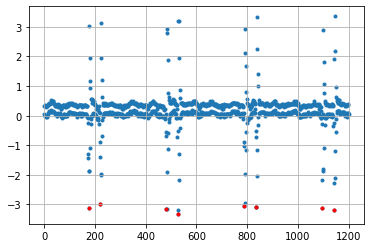

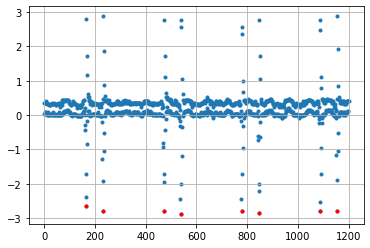

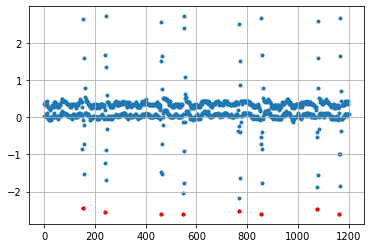

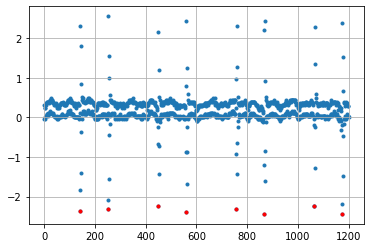

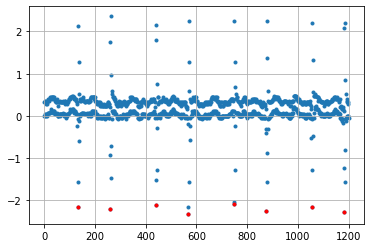

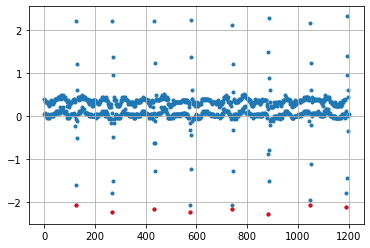

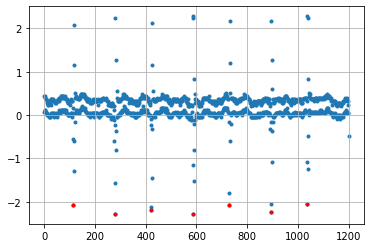

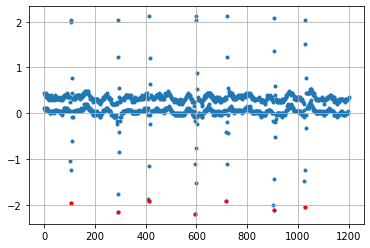

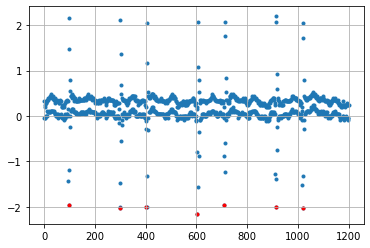

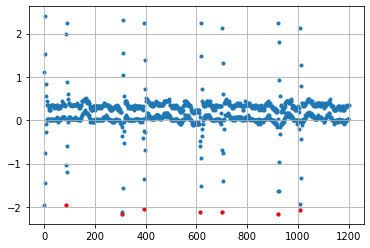

[215.0, 173.66666666666666, 131.66666666666666, 87.0, 52.333333333333336, 22.0, -20.666666666666668, -62.666666666666664, -96.0, -136.0]
[0.5773502691896258, 0.33333333333333337, 0.33333333333333337, 0.5773502691896258, 0.33333333333333337, 0.5773502691896258, 0.33333333333333337, 0.6666666666666667, 0.5773502691896258, 0.5773502691896258]


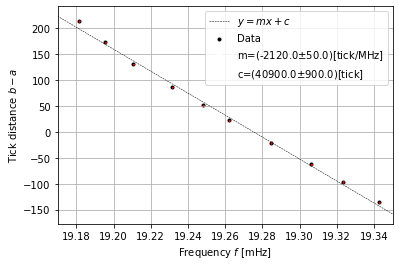

19.3+/-0.6


In [2]:
# Messmethode 1 Wasserstoff
frequencies = [19.1815, 19.1956, 19.2107, 19.2316, 19.2481, 19.2620, 19.2848, 19.3064, 19.3234, 19.3428, 19.3609, 19.3746, 19.3818] #MHz

index = np.arange(1, 11)
messticks = np.arange(1200)

Absorption_signal = []
Sinus_signal = []

for i in index:
    Absorption_signal.append(np.array(np.array(pd.read_csv('NewFile'+str(i)+'.csv'))[1:,0], dtype=float))
    Sinus_signal.append(np.array(np.array(pd.read_csv('NewFile'+str(i)+'.csv'))[1:,1], dtype=float))

    
a1 = []
b1 = []

a2 = []
b2 = []

a3 = []
b3 = []

print(len(Absorption_signal))
for i in np.arange(10):
    peaks, _ = find_peaks(-Absorption_signal[i], height=max(-Absorption_signal[i])-(max(-Absorption_signal[i])/6))
    
    a1.append(peaks[1]-peaks[0])
    b1.append(peaks[2]-peaks[1])
    
    a2.append(peaks[3]-peaks[2])
    b2.append(peaks[4]-peaks[3])
    
    a3.append(peaks[5]-peaks[4])
    b3.append(peaks[6]-peaks[5])
    
    plt.scatter(messticks, Absorption_signal[i], marker='.')
    plt.scatter(peaks, Absorption_signal[i][peaks], marker='.',color='r')
    #plt.scatter(messticks,  Sinus_signal[i], marker='.')
    plt.grid()
    plt.show()
    
B_A = []
delta_B_A = []
    
for i in np.arange(len(a1)):
    B_A.append(mittelwert([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
    if Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]])==0:
        delta_B_A.append(1/np.sqrt(6))
    else:
        delta_B_A.append(Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
    
print(B_A)
print(delta_B_A)
    
popt, pcov = curve_fit(gerade, frequencies[0:10], B_A, sigma=delta_B_A, p0= [-2000, 40000], maxfev=100000)    
# 'popt1, pcov1 = curve_fit(gerade, frequencies[0:10], np.array(b1)-np.array(a1), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)
# popt2, pcov2 = curve_fit(gerade, frequencies[0:10], np.array(b2)-np.array(a2), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)
# popt3, pcov3 = curve_fit(gerade, frequencies[0:10], np.array(b3)-np.array(a3), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)



plt.scatter(frequencies[0:10], B_A, marker='.', color='black', label='Data')
plt.errorbar(frequencies[0:10], B_A, xerr=10*[0.0001], yerr=delta_B_A, fmt='none', capsize=0.5, color='red', lw=0.5)
plt.plot(np.linspace(19.17, 19.35, 10000), gerade(np.linspace(19.17, 19.35, 10000), *popt), color='black',  lw=0.5,  linestyle='dashed', label=r'$y = mx +c$')
plt.scatter(0,0, color='white', label='m=('+str(np.round(popt[0], -1))+r'$\pm$'+str(np.round(np.sqrt(pcov[0][0]), -1))+')[tick/MHz]')
plt.scatter(0,0, color='white', label='c=('+str(np.round(popt[1], -2))+r'$\pm$'+str(np.round(np.sqrt(pcov[1][1]), -2))+')[tick]')
plt.grid()
plt.xlim(19.17, 19.35)
plt.xlabel(r'Frequency $f$ [mHz]')
plt.ylabel(r'Tick distance $b-a$')
plt.legend()
plt.savefig('gyro_wasserstoff.pdf')
plt.show()

m = ufloat(popt[0], np.sqrt(pcov[0][0]))
c = ufloat(popt[1], np.sqrt(pcov[1][1]))

print(-c/m)

# #print(popt1)
# #print(popt2)
# #print(popt3)

# 'plt.scatter(frequencies[0:10], np.array(b1)-np.array(a1), marker='.', color='black', label='Data')
# plt.errorbar(frequencies[0:10], np.array(b1)-np.array(a1), xerr=10*[0.0001], yerr=10*[10], fmt='none', capsize=0.5, color='cyan', lw=0.5)
# plt.plot(np.linspace(19.17, 19.35, 10000), gerade(np.linspace(19.17, 19.35, 10000), *popt1), color='red',  lw=0.5)
# plt.grid()
# plt.xlim(19.17, 19.35)
# plt.show()


# plt.scatter(frequencies[0:10], np.array(b2)-np.array(a2), marker='.', color='black', label='Data')
# plt.errorbar(frequencies[0:10], np.array(b2)-np.array(a2), xerr=10*[0.0001], yerr=10*[10], fmt='none', capsize=0.5, color='cyan', lw=0.5)
# plt.plot(np.linspace(19.17, 19.35, 10000), gerade(np.linspace(19.17, 19.35, 10000), *popt2), color='red',  lw=0.5)
# plt.grid()
# plt.xlim(19.17, 19.35)
# plt.show()


# plt.scatter(frequencies[0:10], np.array(b3)-np.array(a3), marker='.', color='black', label='Data')
# plt.errorbar(frequencies[0:10], np.array(b3)-np.array(a3), xerr=10*[0.0001], yerr=10*[10], fmt='none', capsize=0.5, color='cyan', lw=0.5)
# plt.plot(np.linspace(19.17, 19.35, 10000), gerade(np.linspace(19.17, 19.35, 10000), *popt3), color='red',  lw=0.5)
# plt.grid()
# plt.xlim(19.17, 19.35)
# plt.show()

# m1 = ufloat(popt1[0], np.sqrt(pcov1[0][0]))
# m2 = ufloat(popt2[0], np.sqrt(pcov2[0][0]))
# m3 = ufloat(popt3[0], np.sqrt(pcov3[0][0]))


# c1 = ufloat(popt1[1], np.sqrt(pcov1[1][1]))
# c2 = ufloat(popt2[1], np.sqrt(pcov2[1][1]))
# c3 = ufloat(popt3[1], np.sqrt(pcov3[1][1]))

# print(-c1/m1)
# print(-c2/m2)
# print(-c3/m3)
# print(1/3 * (-c1/m1+-c2/m2+-c3/m3))'

#plt.xlabel()

#print(np.array(a)-np.array(b))



In [3]:



a = ufloat(500.57, 1/np.sqrt(6))
b = ufloat(700.38, 1/np.sqrt(6))
c = ufloat(300.92, 1/np.sqrt(6))
print((a-b) - (a-c))

-399.5+/-0.6


[ 163  230  471  538  541  778  845  848 1086 1152]


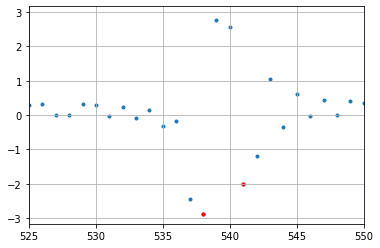

[-2.88 -2.84 -2.8  ...  2.8   2.88  2.88]


In [4]:
peaks, _ = find_peaks(-Absorption_signal[1], height=2)
print(peaks)
#test = []
#for i in peaks:
    #test.append()

plt.scatter(messticks, Absorption_signal[1], marker='.')
plt.scatter(peaks, Absorption_signal[1][peaks], marker='.',color='r')
#plt.scatter(messticks,  Sinus_signal[1], marker='.')
plt.grid()
plt.xlim(525,550)
plt.show()

Absorption_signal[1].sort()
print(Absorption_signal[1])

19
19


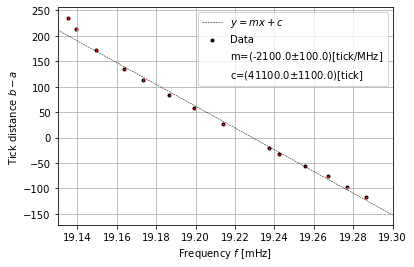

19.2+/-0.8


In [5]:
# Messmethode 1 Glykol
frequencies = [19.1352, 19.1392, 19.1494, 19.1638, 19.1732, 19.1864, 19.1991, 19.2137, 19.2372, 19.2422, 19.2558, 19.2670, 19.2770, 19.2865, 19.2981, 19.3082, 19.3154, 19.3241, 19.3359] #MHz

index = np.arange(14, 33)
messticks = np.arange(1200)

Absorption_signal = []
Sinus_signal = []

for i in index:
    Absorption_signal.append(np.array(np.array(pd.read_csv('NewFile'+str(i)+'.csv'))[1:,0], dtype=float))
    Sinus_signal.append(np.array(np.array(pd.read_csv('NewFile'+str(i)+'.csv'))[1:,1], dtype=float))
    

    
a1 = []
b1 = []

a2 = []
b2 = []

a3 = []
b3 = []

for i in np.arange(19):
    peaks, _ = find_peaks(-Absorption_signal[i], height=max(-Absorption_signal[i])-(max(-Absorption_signal[i])/5))
    
    a1.append(peaks[1]-peaks[0])
    b1.append(peaks[2]-peaks[1])
    
    a2.append(peaks[3]-peaks[2])
    b2.append(peaks[4]-peaks[3])
    
    a3.append(peaks[5]-peaks[4])
    b3.append(peaks[6]-peaks[5])
    
    #plt.scatter(messticks, Absorption_signal[i], marker='.')
    #plt.scatter(peaks, Absorption_signal[i][peaks], marker='.',color='r')
    #plt.scatter(messticks,  Sinus_signal[i], marker='.')
    #plt.grid()
    #plt.show()
    
    
    
B_A = []
delta_B_A = []


for i in np.arange(19):
    B_A.append(mittelwert([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
    if Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]])==0:
        delta_B_A.append(1/np.sqrt(6))
    else:
        delta_B_A.append(Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))


    
        
print(len(B_A))   
print(len(frequencies)) 




popt, pcov = curve_fit(gerade, frequencies[0:14], B_A[0:14], sigma=delta_B_A[0:14], p0= [-2000, 40000], maxfev=100000)    
# 'popt1, pcov1 = curve_fit(gerade, frequencies[0:10], np.array(b1)-np.array(a1), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)
# popt2, pcov2 = curve_fit(gerade, frequencies[0:10], np.array(b2)-np.array(a2), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)
# popt3, pcov3 = curve_fit(gerade, frequencies[0:10], np.array(b3)-np.array(a3), sigma=10*[10], p0= [-2000, 40000], maxfev=100000)



plt.scatter(frequencies[0:14], B_A[0:14], marker='.', color='black', label='Data')
plt.errorbar(frequencies[0:14], B_A[0:14], xerr=14*[0.0001], yerr=delta_B_A[0:14], fmt='none', capsize=0.5, color='red', lw=0.5)
plt.plot(np.linspace(19.13, 19.3, 10000), gerade(np.linspace(19.13, 19.3, 10000), *popt), color='black',  lw=0.5,  linestyle='dashed', label=r'$y = mx +c$')
plt.scatter(0,0, color='white', label='m=('+str(np.round(popt[0], -2))+r'$\pm$'+str(np.round(np.sqrt(pcov[0][0]), -2))+')[tick/MHz]')
plt.scatter(0,0, color='white', label='c=('+str(np.round(popt[1], -2))+r'$\pm$'+str(np.round(np.sqrt(pcov[1][1]), -2))+')[tick]')
plt.grid()
plt.xlabel(r'Frequency $f$ [mHz]')
plt.ylabel(r'Tick distance $b-a$')
plt.legend()
plt.xlim(19.13, 19.3)
plt.savefig('gyro_glykol.pdf')
plt.show()
m = ufloat(popt[0], np.sqrt(pcov[0][0]))
c = ufloat(popt[1], np.sqrt(pcov[1][1]))

print(-c/m)



[ 2  4  7 12 17 19 29 34 39 44]


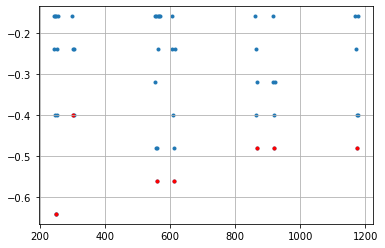

[ 1  6  9 11 15 20 24 27 30]


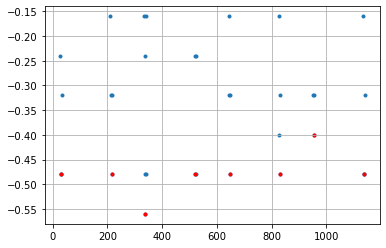

[ 1  4  8 12 14 18 22 25]


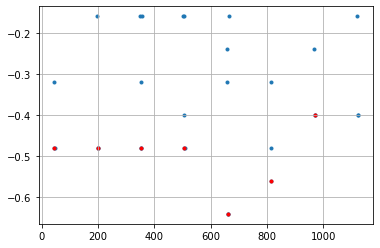

[ 3  5  8 11 14 18 23 27 30 33 39]


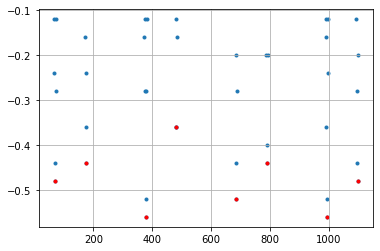

[ 2  7 13 16 20 25 27 33 35 40 43 45 50]


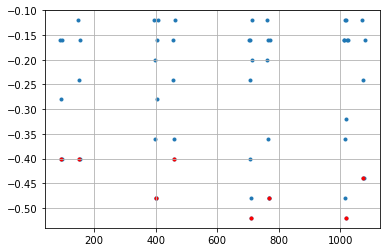

[ 2  4 15 20 22 28 35 37 43 48 50 56]


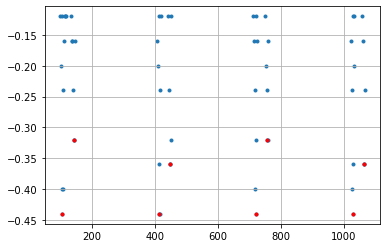

In [6]:
# Messmethode 1 Teflon


peaks0 = [ 4,  12, 19, 29, 34, 39, 44] 
peaks1 = [ 1,  6,  11, 15, 20, 24, 27, 30]  
peaks2 = [ 1,  4,  8,  14, 18, 22, 25]
peaks3 = [  3,   8, 14, 18, 23, 27,  33, 39]
peaks4 = [  2,  7, 13,  20,  27,  35,  43,  50]
peaks5 = [  4, 15,  22, 28,  37, 43,  50, 56]
Peaks = [peaks0, peaks1, peaks2, peaks3, peaks4, peaks5]


frequencies = [18.2578, 18.2939, 18.3103, 18.3344, 18.3569, 18.3612] #MHz

index = np.arange(1, 7)
messticks = np.arange(1200)

Absorption_signal = []
Sinus_signal = []

for i in index:
    Absorption_signal.append(np.array(np.array(pd.read_csv('teflon_'+str(i)+'.csv'))[1:,0], dtype=float))
    Sinus_signal.append(np.array(np.array(pd.read_csv('teflon_'+str(i)+'.csv'))[1:,1], dtype=float))
    
Absorption = []
absorption = []

Ticks = []
ticks = []

for i in np.arange(6):
    absorption = []
    ticks = []
    for j in np.arange(len(Absorption_signal[i])-1):
        if Absorption_signal[i][j] <= -0.1:
            absorption.append(Absorption_signal[i][j])
            ticks.append(j)
    Absorption.append(absorption)
    Ticks.append(ticks)
            
       
    
    
a1 = []
b1 = []

a2 = []
b2 = []

a3 = []
b3 = []

for i in np.arange(6):
    peaks, _ = find_peaks(-np.array(Absorption[i]), height=-0.35)#height=max(-np.array(Absorption[i]))-(max(-np.array(Absorption[i]))/4))
    print(peaks)
#     a1.append(peaks[1]-peaks[0])
#     b1.append(peaks[2]-peaks[1])
    
#     a2.append(peaks[3]-peaks[2])
#     b2.append(peaks[4]-peaks[3])
    
#     a3.append(peaks[5]-peaks[4])
#     b3.append(peaks[6]-peaks[5])
    plt.scatter(Ticks[i], Absorption[i], marker='.')
    plt.scatter(np.array(Ticks[i])[Peaks[i]], np.array(Absorption[i])[Peaks[i]], marker='.',color='r')
    plt.grid()
    plt.show()
    
peaks1 = [2,  4,  7, 12, 19, 29, 34, 39, 44]    
    
# B_A = []
# delta_B_A = []


# for i in np.arange(19):
#     B_A.append(mittelwert([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
#     if Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]])==0:
#         delta_B_A.append(1/np.sqrt(6))
#     else:
#         delta_B_A.append(Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))

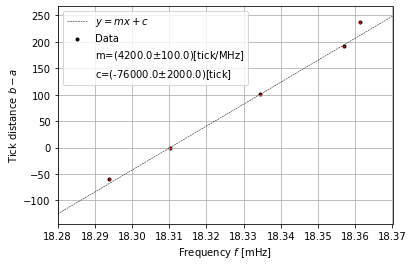

18.3+/-0.8


In [7]:
frequencies = [ 18.2939, 18.3103, 18.3344, 18.3569, 18.3612] #MHz


peaks0 = [ 4,  12, 19, 29, 34, 39, 44] 
peaks1 = [ 1,  6,  11, 15, 20, 24, 27, 30]  
peaks2 = [ 1,  4,  8,  14, 18, 22, 25]
peaks3 = [  3,   8, 14, 18, 23, 27,  33, 39]
peaks4 = [  2,  7, 13,  20,  27,  35,  43,  50]
peaks5 = [  4, 15,  22, 28,  37, 43,  50, 56]
Peaks = [peaks0, peaks1, peaks2, peaks3, peaks4, peaks5]




for i in np.arange(1, 6):
    
    a1.append(np.array(Ticks[i])[Peaks[i]][1]-np.array(Ticks[i])[Peaks[i]][0])
    b1.append(np.array(Ticks[i])[Peaks[i]][2]-np.array(Ticks[i])[Peaks[i]][1])
    
    a2.append(np.array(Ticks[i])[Peaks[i]][3]-np.array(Ticks[i])[Peaks[i]][2])
    b2.append(np.array(Ticks[i])[Peaks[i]][4]-np.array(Ticks[i])[Peaks[i]][3])
    
    a3.append(np.array(Ticks[i])[Peaks[i]][5]-np.array(Ticks[i])[Peaks[i]][4])
    b3.append(np.array(Ticks[i])[Peaks[i]][6]-np.array(Ticks[i])[Peaks[i]][5])
    
    
B_A = []
delta_B_A = []


for i in np.arange(5):
    B_A.append(mittelwert([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
    if Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]])==0:
        delta_B_A.append(1/np.sqrt(6))
    else:
        delta_B_A.append(Stanmi([b1[i]-a1[i], b2[i]-a2[i], b3[i]-a3[i]]))
        
        
        
        
popt, pcov = curve_fit(gerade, frequencies, B_A, sigma=delta_B_A, p0= [-2000, 40000], maxfev=100000)    



plt.scatter(frequencies, B_A, marker='.', color='black', label='Data')
plt.errorbar(frequencies, B_A, xerr=5*[0.0001], yerr=delta_B_A, fmt='none', capsize=0.5, color='red', lw=0.5)
plt.plot(np.linspace(18.28, 18.37, 10000), gerade(np.linspace(18.28, 18.37, 10000), *popt), color='black',  lw=0.5,  linestyle='dashed', label=r'$y = mx +c$')
plt.scatter(0,0, color='white', label='m=('+str(np.round(popt[0], -2))+r'$\pm$'+str(np.round(np.sqrt(pcov[0][0]), -2))+')[tick/MHz]')
plt.scatter(0,0, color='white', label='c=('+str(np.round(popt[1], -3))+r'$\pm$'+str(np.round(np.sqrt(pcov[1][1]), -3))+')[tick]')
plt.grid()
plt.xlabel(r'Frequency $f$ [mHz]')
plt.ylabel(r'Tick distance $b-a$')
plt.legend()
plt.xlim(18.28, 18.37)
plt.savefig('gyro_teflon.pdf')
plt.show()
m = ufloat(popt[0], np.sqrt(pcov[0][0]))
c = ufloat(popt[1], np.sqrt(pcov[1][1]))

print(-c/m)